## get the china provinces shapely form

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import geopandas as gpd
import os.path
import geopandas as gpd
import sys

scripts_path = "../scripts/"
sys.path.append(os.path.abspath(scripts_path))





In [3]:
NATURAL_EARTH_RESOLUTION = '10m' # 1:10m scale
NATURAL_EARTH_DATA_SET = 'admin_1_states_provinces'
CRS = 4326 # WGS84

def make_province_shape_file(country_iso2_code = 'CN', output_file="..data/province_shapes/CHN_adm1.shp"):

    shpfilename = shpreader.natural_earth(resolution=NATURAL_EARTH_RESOLUTION,
                                    category='cultural',
                                    name=NATURAL_EARTH_DATA_SET)
    reader = shpreader.Reader(shpfilename)
    print("downloaded succesfully")
    provinces_states = reader.records()

    def filter_country_code(records:object, target_iso_a2_code = 'CN')->list:
        """filter provincial/state (admin level 1) records for one country

        Args:
            records (shpreader.Reader.records): the records object from cartopy shpreader for natural earth dataset
            target_iso_a2_code (str, optional): the country code (iso_a2) for which provincial records will be extracted. Defaults to 'CN'.

        Returns:
            list: records list
        """    
        results = []
        for rec in records:
            if rec.attributes['iso_a2'] == target_iso_a2_code:
                results.append(rec)
        
        return results
    
    provinces_states = filter_country_code(provinces_states, target_iso_a2_code=country_iso2_code)

    return provinces_states

    gdf = gpd.GeoDataFrame(geometry=[r.geometry for r in res])
    gdf.set_crs(epsg=CRS, inplace=True)  # WGS84
    gdf.to_file(output_file)

recs = make_province_shape_file()

downloaded succesfully


In [47]:
recs[0].attributes

{'featurecla': 'Admin-1 states provinces',
 'scalerank': 2,
 'adm1_code': 'CHN-1756',
 'diss_me': 1756,
 'iso_3166_2': 'CN-XJ',
 'wikipedia': '',
 'iso_a2': 'CN',
 'adm0_sr': 1,
 'name': 'Xinjiang',
 'name_alt': 'Xinjiang Uygur|Xīnjiāng Wéiwúěr',
 'name_local': '新疆維吾爾自治區|新疆维吾尔自治区',
 'type': 'Zìzhìqu',
 'type_en': 'Autonomous Region',
 'code_local': '',
 'code_hasc': 'CN.XJ',
 'note': '',
 'hasc_maybe': '',
 'region': 'Northwest China',
 'region_cod': '6',
 'provnum_ne': 49,
 'gadm_level': 1,
 'check_me': 20,
 'datarank': 1,
 'abbrev': '',
 'postal': 'XJ',
 'area_sqkm': 0,
 'sameascity': -99,
 'labelrank': 2,
 'name_len': 8,
 'mapcolor9': 4,
 'mapcolor13': 3,
 'fips': 'CH13',
 'fips_alt': '',
 'woe_id': 12578003,
 'woe_label': 'Xinjiang, CN, China',
 'woe_name': 'Xinjiang',
 'latitude': 41.122,
 'longitude': 85.4253,
 'sov_a3': 'CH1',
 'adm0_a3': 'CHN',
 'adm0_label': 2,
 'admin': 'China',
 'geonunit': 'China',
 'gu_a3': 'CHN',
 'gn_id': 1529047,
 'gn_name': 'Xinjiang Uygur Zizhiqu',
 '

In [48]:
recs[0].attributes["name"]
d = {"province": [r.attributes['name_en'] for r in recs], "id": [r.attributes['region_cod'] for r in recs]}
geo = [r.geometry for r in recs]
gdf = gpd.GeoDataFrame(d, geometry= geo)
gdf

,province,id,geometry
0,Xinjiang,6,"POLYGON ((77.88313 35.43107, 77.85709 35.4366,..."
1,Tibet,5,"POLYGON ((78.91769 33.38626, 78.91595 33.38766..."
2,Inner Mongolia,1,"POLYGON ((115.91451 47.68391, 115.8527 47.7055..."
3,Gansu,6,"POLYGON ((96.36634 42.72292, 96.37926 42.72055..."
4,Yunnan,5,"POLYGON ((101.86792 22.37884, 101.8426 22.3833..."
5,Heilongjiang,2,"POLYGON ((123.27731 53.56944, 123.30956 53.567..."
6,Jilin,2,"POLYGON ((131.25285 43.46917, 131.26168 43.463..."
7,Liaoning,2,"MULTIPOLYGON (((125.70409 40.85919, 125.68321 ..."
8,Guangxi,4,"MULTIPOLYGON (((105.66495 23.04337, 105.63684 ..."
9,Guangdong,4,"MULTIPOLYGON (((114.18304 22.5562, 114.17322 2..."


In [50]:
gdf.set_index("id", drop=True)

,province,geometry
id,,
6,Xinjiang,"POLYGON ((77.88313 35.43107, 77.85709 35.4366,..."
5,Tibet,"POLYGON ((78.91769 33.38626, 78.91595 33.38766..."
1,Inner Mongolia,"POLYGON ((115.91451 47.68391, 115.8527 47.7055..."
6,Gansu,"POLYGON ((96.36634 42.72292, 96.37926 42.72055..."
5,Yunnan,"POLYGON ((101.86792 22.37884, 101.8426 22.3833..."
2,Heilongjiang,"POLYGON ((123.27731 53.56944, 123.30956 53.567..."
2,Jilin,"POLYGON ((131.25285 43.46917, 131.26168 43.463..."
2,Liaoning,"MULTIPOLYGON (((125.70409 40.85919, 125.68321 ..."
4,Guangxi,"MULTIPOLYGON (((105.66495 23.04337, 105.63684 ..."


In [49]:
gdf.sort_values("province")

,province,id,geometry
31,Anhui,3,"POLYGON ((119.62978 31.13288, 119.62074 31.049..."
19,Beijing,1,"POLYGON ((117.3568 40.25703, 117.36971 40.2179..."
21,Chongqing,5,"POLYGON ((107.81154 30.79802, 107.82492 30.798..."
11,Fujian,,"MULTIPOLYGON (((117.4689 23.75309, 117.50416 2..."
3,Gansu,6,"POLYGON ((96.36634 42.72292, 96.37926 42.72055..."
9,Guangdong,4,"MULTIPOLYGON (((114.18304 22.5562, 114.17322 2..."
8,Guangxi,4,"MULTIPOLYGON (((105.66495 23.04337, 105.63684 ..."
22,Guizhou,5,"POLYGON ((107.49611 29.2461, 107.50169 29.2450..."
10,Hainan,4,"POLYGON ((111.01051 19.68378, 111.01637 19.678..."
16,Hebei,1,"MULTIPOLYGON (((117.54355 38.62132, 117.56597 ..."


In [12]:

gdf = gpd.GeoDataFrame(geometry=[r.geometry for r in res])
gdf.set_crs(epsg=4326, inplace=True)  # WGS84
gdf.to_file("../data/test.shp")

NameError: name 'res' is not defined

In [41]:
g = gdf.iloc[0].geometry
g.centroid.xy[0][0]

85.18930509073354

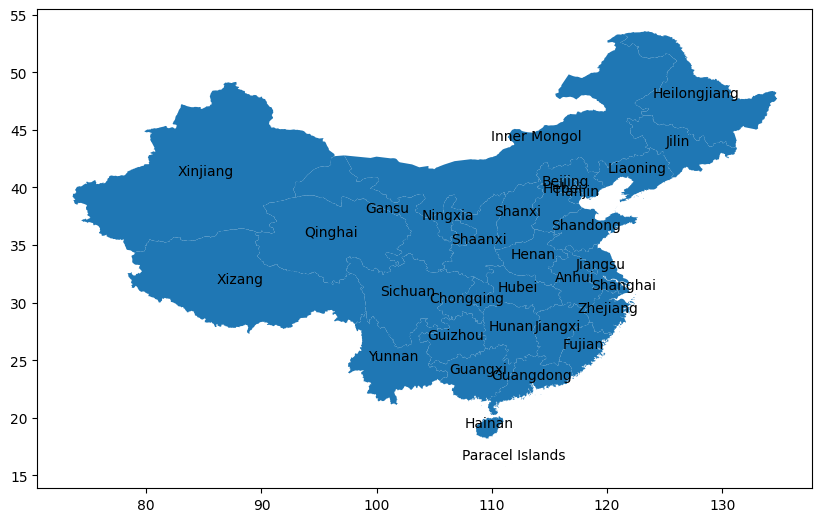

In [43]:
fig, ax = plt.subplots(figsize = (10,10))
gdf.plot(ax = ax)

center_point = lambda poly: (poly.centroid.xy[0][0],poly.centroid.xy[1][0])
for idx, row in gdf.iterrows():   
    plt.annotate(text=row["province"], xy=center_point(row["geometry"]), horizontalalignment= "center")

In [2]:
target = "../../resources/data/province_shapes/CHN_adm1.shp"
gpd.read_file(target)

,FID,geometry
0,0,"POLYGON ((77.88313 35.43107, 77.85709 35.4366,..."
1,1,"POLYGON ((78.91769 33.38626, 78.91595 33.38766..."
2,2,"POLYGON ((115.91451 47.68391, 115.8527 47.7055..."
3,3,"POLYGON ((96.36634 42.72292, 96.37926 42.72055..."
4,4,"POLYGON ((101.86792 22.37884, 101.8426 22.3833..."
5,5,"POLYGON ((123.27731 53.56944, 123.30956 53.567..."
6,6,"POLYGON ((131.25285 43.46917, 131.26168 43.463..."
7,7,"MULTIPOLYGON (((125.70409 40.85919, 125.68321 ..."
8,8,"MULTIPOLYGON (((105.66495 23.04337, 105.63684 ..."
9,9,"MULTIPOLYGON (((114.18304 22.5562, 114.17322 2..."
